In [6]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
#data to read in 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_guan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_guch = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_nong = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_shun = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
df_tian = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

In [8]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove
#features: year, month, day, and hour

def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [9]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_guan = set_datetime(df_guan)
df_guch = set_datetime(df_guch)
df_huai = set_datetime(df_huai)
df_nong = set_datetime(df_nong)
df_shun = set_datetime(df_shun)
df_tian = set_datetime(df_tian)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [19]:
#value_counts() on wd - wind direction 
print('Changping Station:')
display(df_chang['wd'].value_counts())
display(df_chang['wd'].nunique())

Changping Station:


NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

16

Each station has 16 unique `wd` (wind direction) values:
- N: north
- NW: north west
- NNW: north north west
- NE: north east
- NNE: north north east
---
- S: south 
- SW: south west
- SSW: south south west
- SE: south east
- SSE: south south east
---
- E: east
- ENE: east north east
- ESE: east south east
---
- W: west
- WNW: west north west
- WSW: west south west

In [20]:
#resampling to daily average because stakeholder only wants day by day forecasting
df_chang_avg = df_chang.resample('D').mean()
df_dong_avg = df_dong.resample('D').mean()
df_guan_avg = df_guan.resample('D').mean()
df_guch_avg = df_guch.resample('D').mean()
df_huai_avg = df_huai.resample('D').mean()
df_nong_avg = df_nong.resample('D').mean()
df_shun_avg = df_shun.resample('D').mean()
df_tian_avg = df_tian.resample('D').mean()
df_wanl_avg = df_wanl.resample('D').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-01,12.5,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,36.5,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,60.5,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,84.5,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,108.5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      1461 non-null   float64
 1   PM2.5   1450 non-null   float64
 2   PM10    1454 non-null   float64
 3   SO2     1457 non-null   float64
 4   NO2     1457 non-null   float64
 5   CO      1449 non-null   float64
 6   O3      1457 non-null   float64
 7   TEMP    1461 non-null   float64
 8   PRES    1461 non-null   float64
 9   DEWP    1461 non-null   float64
 10  RAIN    1461 non-null   float64
 11  WSPM    1461 non-null   float64
dtypes: float64(12)
memory usage: 148.4 KB


None

Before resampling had 35,064 entries now with taking the daily average have gone down to 1,461 observations. This makes sense there was 24 entries per day, and now it has only one. Not very ideal for time series but if it performs badly will go back to hourly.

In [31]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_guan_avg, df_guch_avg, df_huai_avg, df_nong_avg, 
         df_shun_avg, df_tian_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#NO2
print('NO2 null values')   
for df in df_list:
    print(df['NO2'].isna().sum().sum())

Total null values:
42
161
61
41
71
19
95
34
86


NO2 null values
4
44
5
3
11
2
19
3
22


The total nulls for the station are all fairly low, the highest being 161 - Dongsi station located in the Dongsheng District (Beijing city center). 11% of the data is missing for Dongsi. The second highest is Shunyi station located in Shunyi District with 95 total missing values. 6.5% of the data is missing. 

The NO2 null values are also low, the highest being 44, once again the Dongsi station. 3% of the total data and 27.3% of the missing data. The second highest is Wanliu station located in Haidan District with 22 missing. 1.5% of the total data and 25.6% of its missing data. 

The station with the lowest missing values are Tiantan with 34 total and Nongzhanguan 2 NO2.

In [41]:
#.describe() on all stations
print("Changping Station:")
display(df_chang_avg.describe()) 

print("Dongsi Station:")
display(df_dong_avg.describe())

print("Guanyan Station:")
display(df_guan_avg.describe())

print("Gucheng Station:")
display(df_guch_avg.describe())

print("Huairou Station:")
display(df_huai_avg.describe())

print("Nongzhanguan Station:")
display(df_nong_avg.describe())

print("Shunyi Station:")
display(df_shun_avg.describe())

print("Tiantan Station:")
display(df_tian_avg.describe())

print("Wanliu Station:")
display(df_wanl_avg.describe())

Changping Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1450.000000,1454.000000,1457.000000,1457.000000,1449.000000,1457.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,71.132419,94.707382,14.946529,44.203584,1156.484856,57.914297,13.669765,1007.771600,1.485966,0.060314,1.854499
std,10125.568428,62.271223,67.917777,18.024497,23.295778,938.421140,39.543996,10.791162,10.020896,13.609187,0.275798,0.820881
min,12.500000,4.350000,5.625000,1.000000,6.833333,125.000000,2.000000,-14.958333,985.812500,-32.229167,0.000000,0.454167
25%,8772.500000,25.343750,43.343750,3.625000,27.666667,562.500000,26.791667,3.275000,999.237500,-10.487500,0.000000,1.304167
50%,17532.500000,53.375000,79.312500,8.000000,37.157895,858.333333,51.708333,14.950000,1007.541667,1.470833,0.000000,1.641667
75%,26292.500000,95.333333,124.520833,18.400000,55.625000,1370.833333,80.958333,23.587500,1016.066667,14.016667,0.000000,2.166667
max,35052.500000,433.458333,482.750000,137.958333,150.416667,7612.500000,186.916667,32.366667,1034.933333,26.000000,6.708333,7.237500


Dongsi Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1456.000000,1457.000000,1457.000000,1417.000000,1361.000000,1457.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,86.206309,110.351618,18.519460,53.675090,1332.887620,57.413080,13.667716,1012.552346,2.443317,0.064013,1.861180
std,10125.568428,73.914045,80.328873,19.808613,25.868793,1006.561340,39.459925,10.906688,10.064499,13.551483,0.337611,0.787483
min,12.500000,3.000000,4.833333,1.000000,2.125000,137.500000,1.541667,-15.233333,990.345833,-32.566667,0.000000,0.520833
25%,8772.500000,32.833333,51.500000,5.166667,36.000000,708.333333,26.708333,2.995833,1004.016667,-9.166667,0.000000,1.312500
50%,17532.500000,66.085227,90.750000,11.416667,48.625000,1054.166667,52.500000,15.104167,1012.470833,2.812500,0.000000,1.666667
75%,26292.500000,114.842708,142.583333,24.708333,65.119783,1608.333333,81.875000,23.600000,1020.958333,14.900000,0.000000,2.208333
max,35052.500000,567.416667,584.666667,143.136364,174.000000,8166.666667,524.869565,32.350000,1039.945833,27.258333,9.816667,6.095833


Guanyan Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1456.000000,1459.000000,1457.000000,1456.000000,1423.000000,1454.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,83.025238,109.115466,17.615603,58.033561,1268.196743,55.200788,13.580898,1011.852159,3.118483,0.067412,1.708929
std,10125.568428,70.089651,75.066997,20.276439,27.742588,992.985131,39.282954,10.791968,10.204121,13.445228,0.350489,0.748032
min,12.500000,5.125000,7.291667,1.666667,6.041667,100.000000,1.000000,-15.233333,988.908333,-32.566667,0.000000,0.258333
25%,8772.500000,33.416667,53.604167,4.416667,38.441504,659.601449,23.031250,3.083333,1003.337500,-8.433333,0.000000,1.175000
50%,17532.500000,63.875000,93.500000,10.166667,51.375000,987.500000,48.666667,15.116667,1011.541667,3.600000,0.000000,1.541667
75%,26292.500000,110.968750,141.812500,22.583333,71.489583,1500.000000,82.656250,23.529167,1020.208333,15.441667,0.000000,2.054167
max,35052.500000,536.083333,555.416667,158.318182,172.200000,8073.913043,176.130435,32.350000,1039.945833,26.679167,9.816667,5.875000


Gucheng Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1460.000000,1461.000000,1458.000000,1458.000000,1437.000000,1451.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,84.054230,119.080492,15.437393,55.982449,1328.127327,57.536314,13.855130,1008.836390,2.599769,0.064429,1.344203
std,10125.568428,70.937663,75.938479,17.983109,28.160558,1038.716562,38.316143,10.703463,9.898921,13.553435,0.381095,0.780250
min,12.500000,5.333333,6.333333,1.583333,4.347826,100.000000,2.000000,-14.291667,986.887500,-31.633333,0.000000,0.170833
25%,8772.500000,34.414773,61.708333,3.135326,35.760417,675.000000,25.104167,3.541667,1000.412500,-9.112500,0.000000,0.825000
50%,17532.500000,65.666667,106.708333,8.174242,50.183333,1000.000000,51.541667,15.258333,1008.800000,2.879167,0.000000,1.145833
75%,26292.500000,111.135417,154.083333,21.093750,72.604167,1608.083333,83.324275,23.733333,1016.916667,15.120833,0.000000,1.670833
max,35052.500000,519.750000,564.666667,128.818182,188.291667,8904.166667,182.041667,32.029167,1036.158333,25.933333,11.108333,7.195833


Huairou Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1450.000000,1450.000000,1450.000000,1450.000000,1448.000000,1447.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,69.588772,91.515915,12.139852,32.169183,1022.983175,59.888640,12.428703,1007.612686,2.218072,0.067855,1.652442
std,10125.568428,61.060505,66.163801,15.170709,20.579090,737.245553,39.057730,11.019101,9.815174,13.807270,0.318022,0.724083
min,12.500000,3.208333,5.208333,1.083333,2.086957,126.086957,2.000000,-15.683333,985.787500,-32.829167,0.000000,0.554167
25%,8772.500000,25.203351,41.218750,2.952370,16.784873,532.954545,30.499764,1.850000,999.433333,-10.075000,0.000000,1.166667
50%,17532.500000,50.458333,76.583333,5.825758,27.593486,846.726190,52.791667,13.975000,1007.545833,2.329167,0.000000,1.483333
75%,26292.500000,95.604167,124.333333,14.678030,43.031250,1283.333333,82.375000,22.666667,1015.408333,15.187500,0.000000,1.878261
max,35052.500000,445.958333,506.708333,136.375000,123.208333,7216.666667,217.416667,31.075000,1034.500000,27.616667,5.608333,5.470833


Nongzhanguan Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1460.000000,1460.000000,1460.000000,1459.000000,1448.000000,1460.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,84.970007,109.297843,18.744742,58.183978,1330.490602,58.391178,13.667716,1012.552346,2.443317,0.064013,1.861180
std,10125.568428,74.040011,78.455562,21.034570,27.541867,1057.486405,39.129104,10.906688,10.064499,13.551483,0.337611,0.787483
min,12.500000,3.842105,7.391304,1.000000,7.714286,100.000000,1.125000,-15.233333,990.345833,-32.566667,0.000000,0.520833
25%,8772.500000,32.593750,51.568182,4.774457,38.520833,674.989583,26.481731,2.995833,1004.016667,-9.166667,0.000000,1.312500
50%,17532.500000,62.833333,90.520833,11.000000,52.416667,1022.916667,52.812500,15.104167,1012.470833,2.812500,0.000000,1.666667
75%,26292.500000,113.625000,141.010417,24.135417,71.937500,1609.375000,83.156250,23.600000,1020.958333,14.900000,0.000000,2.208333
max,35052.500000,514.000000,520.217391,150.363636,193.826087,8117.391304,185.500000,32.350000,1039.945833,27.258333,9.816667,6.095833


Shunyi Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1451.000000,1460.000000,1452.000000,1442.000000,1427.000000,1439.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,79.725670,98.872346,13.479468,43.904412,1191.199586,55.125291,13.373894,1013.073145,2.449772,0.061034,1.808294
std,10125.568428,68.063374,70.702200,15.869437,22.653098,943.854826,36.501120,10.895534,9.965922,13.459392,0.290444,0.769695
min,12.500000,3.000000,5.000000,0.714000,5.500000,100.000000,2.000000,-15.312500,991.070833,-33.020833,0.000000,0.525000
25%,8772.500000,28.916667,44.739583,3.083333,27.166667,578.713768,25.948983,2.708333,1004.741667,-9.137500,0.000000,1.300000
50%,17532.500000,60.250000,81.853261,7.083333,38.500000,937.500000,49.250000,14.966667,1012.975000,2.770833,0.000000,1.641667
75%,26292.500000,108.395833,131.504167,17.604167,56.701705,1487.500000,77.403080,23.379167,1020.995833,14.925000,0.000000,2.091667
max,35052.500000,514.625000,515.333333,156.416667,141.625000,8685.714286,183.000000,32.075000,1041.025000,25.841667,5.979167,5.783333


Tiantan Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1461.000000,1461.000000,1440.000000,1458.000000,1455.000000,1457.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,82.029531,106.332842,14.444181,53.237356,1302.730406,55.878540,13.667716,1012.552346,2.443317,0.064013,1.861180
std,10125.568428,69.625903,73.340129,16.074029,24.541022,1000.393538,38.168276,10.906688,10.064499,13.551483,0.337611,0.787483
min,12.500000,5.416667,7.208333,1.083333,3.791667,185.714286,1.208333,-15.233333,990.345833,-32.566667,0.000000,0.520833
25%,8772.500000,32.416667,52.625000,4.333333,35.875000,667.424242,24.416667,2.995833,1004.016667,-9.166667,0.000000,1.312500
50%,17532.500000,62.458333,88.708333,8.625000,47.875000,1020.833333,50.458333,15.104167,1012.470833,2.812500,0.000000,1.666667
75%,26292.500000,109.333333,137.083333,18.347826,64.875000,1541.666667,80.166667,23.600000,1020.958333,14.900000,0.000000,2.208333
max,35052.500000,499.333333,537.125000,131.130435,170.666667,8570.833333,200.666667,32.350000,1039.945833,27.258333,9.816667,6.095833


Wanliu Station:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1461.000000,1461.000000,1461.000000,1461.000000,1439.000000,1415.000000,1443.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,17532.500000,83.449190,110.559175,18.409331,65.378846,1325.262114,48.198850,13.425206,1011.103116,3.261915,0.068251,1.501712
std,10125.568428,70.586727,75.717807,19.906557,30.684542,1082.363236,36.527429,10.658391,10.153493,13.437656,0.370888,0.655823
min,12.500000,4.291667,6.333333,2.000000,2.000000,100.000000,0.214200,-14.166667,988.908333,-31.641667,0.000000,0.258333
25%,8772.500000,32.916667,53.125000,5.250000,43.639653,656.250000,17.358722,2.995833,1002.479167,-8.429167,0.000000,1.045833
50%,17532.500000,64.652174,93.875000,11.826087,59.625000,966.666667,41.375000,14.916667,1010.900000,3.754167,0.000000,1.345833
75%,26292.500000,110.791667,142.416667,23.500000,82.675439,1579.166667,70.978261,23.204167,1019.462500,15.583333,0.000000,1.779167
max,35052.500000,481.291667,514.375000,149.416667,201.285714,8060.869565,180.086957,31.437500,1038.529167,26.679167,10.500000,4.758333


Changping Station NO2: 
- mean: 44.20
- median: 37.16
- max: 150.42

Dongsi Station NO2:
- mean: 53.67
- median: 48.63
- max: 174

Guanyan Station NO2:
- mean: 58.03
- median: 51.38
- max: 172

Gucheng Station NO2:
- mean: 55.98
- median: 50.18
- max: 188.29

Huairou Station NO2:
- mean: 32.16
- median: 27.59
- max: 123.208

Nongzhanguan Station NO2:
- mean: 58.18
- median: 52.42
- max: 193.83

Shunyi Station NO2:
- mean: 43.90
- median: 38.5
- max: 141.63

Tiantan Station NO2:
- mean: 53.24
- median: 47.88
- max: 170.67

Wanliu Station NO2:
- mean: 65.38
- median: 59.63
- max: 201.29

---
The Wanliu Station has the highest NO2 in mean, median, and max. Looking at the mean and median values will impute with the median since the max values are quite far from the 75 percentile. These would be condsidered the outliers; however I would like to keep them so as to not reduce anymore the observations that I am working with and to also see those spikes within the time series. 

## Distribution of NO2

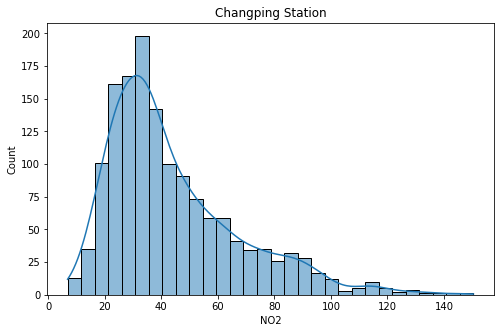

In [58]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='NO2', kde=True)
plt.title("Changping Station");

Changping has a right (positive) skewed distribution with bulk of NO2 being within 20 to 50 range; trailing off to 140.

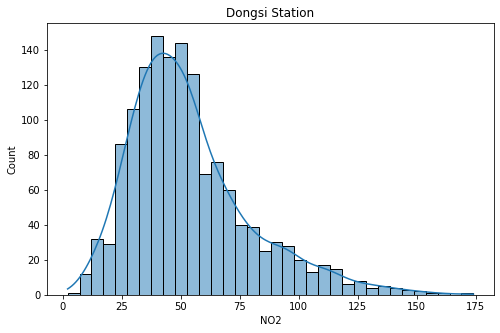

In [60]:
#histogram for Dongsi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_dong_avg, x='NO2', kde=True)
plt.title("Dongsi Station");

Dongsi has a right (positive) skewed distribution with bulk of NO2 being within 25 to 75 range; trailing off to 175.

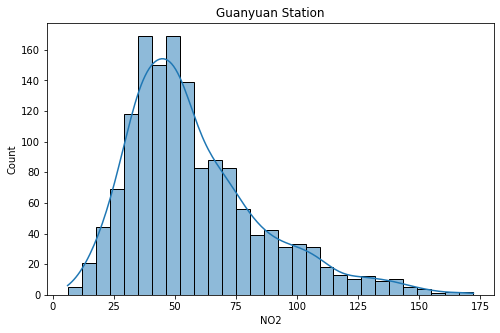

In [59]:
#histogram for Guanyuan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guan_avg, x='NO2', kde=True)
plt.title("Guanyuan Station");

Guanyuan has a right (positive) skewed distribution with bulk of NO2 being within 25 to 80 range; trailing off to 175.

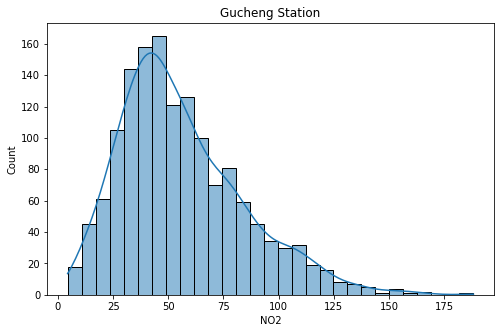

In [61]:
#histogram for Gucheng Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guch_avg, x='NO2', kde=True)
plt.title("Gucheng Station");

Gucheng has a right (positive) skewed distribution with bulk of NO2 being within 25 to 80 range; trailing off to 175.

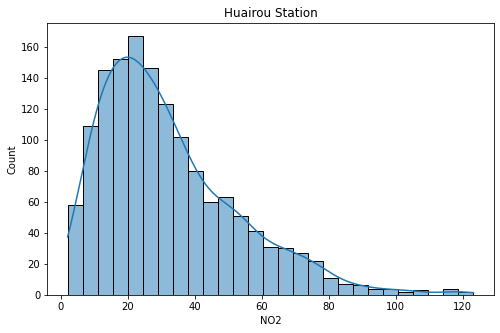

In [62]:
#histogram for Huairou Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_huai_avg, x='NO2', kde=True)
plt.title("Huairou Station");

Huairou has a right (positive) skewed distribution with bulk of NO2 being within 5 to 60 range; trailing off to 120.

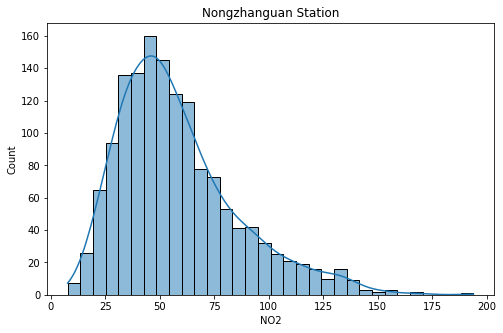

In [63]:
#histogram for Nongzhanguan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_nong_avg, x='NO2', kde=True)
plt.title("Nongzhanguan Station");

Nongzhanguan has a right (positive) skewed distribution with bulk of NO2 being within 25 to 80 range; trailing off to 200.

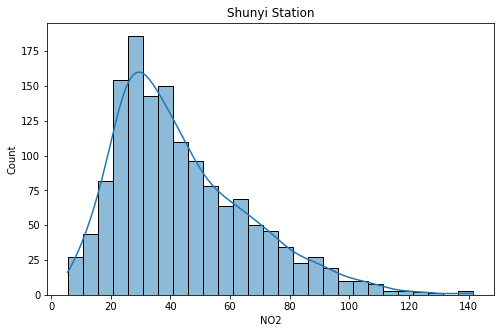

In [64]:
#histogram for Shunyi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_shun_avg, x='NO2', kde=True)
plt.title("Shunyi Station");

Shunyi has a right (positive) skewed distribution with bulk of NO2 being within 20 to 70 range; trailing off to 140.

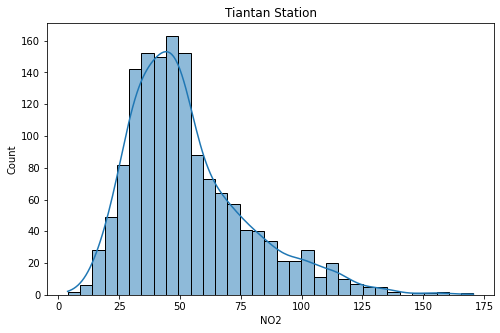

In [66]:
#histogram for Tiantan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_tian_avg, x='NO2', kde=True)
plt.title("Tiantan Station");

Tiantan has a right (positive) skewed distribution with bulk of NO2 being within 25 to 75 range; trailing off to 175.

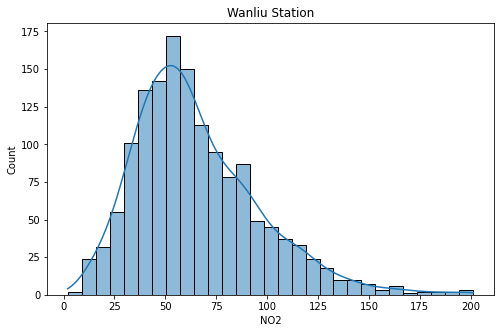

In [67]:
#histogram for Wanliu Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_wanl_avg, x='NO2', kde=True)
plt.title("Wanliu Station");

Wanliu has a right (positive) skewed distribution with bulk of NO2 being within 25 to 90 range; trailing off to 200.

## Line Plots of NO2

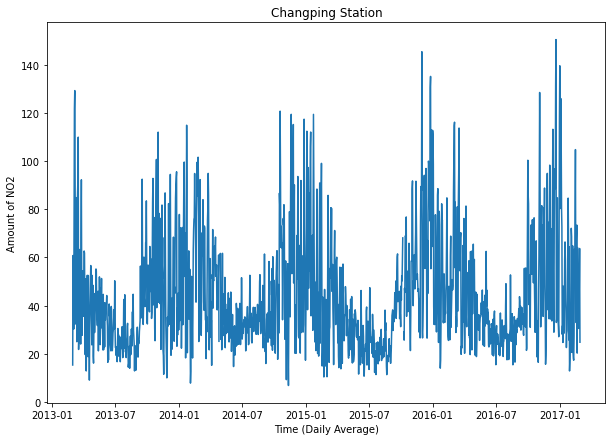

In [88]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='NO2')
plt.ylabel("Amount of NO2")
plt.xlabel('Time (Daily Average)')
plt.title("Changping Station");

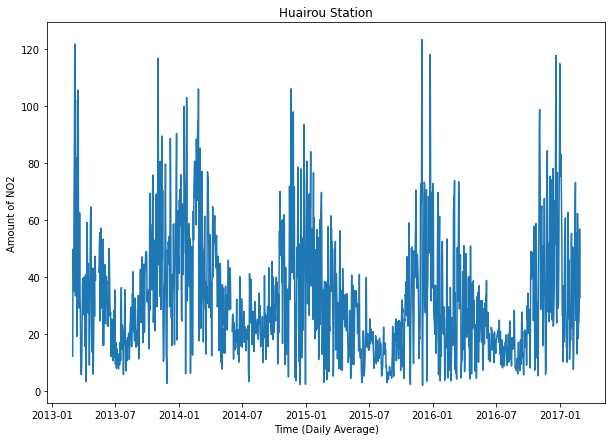

In [89]:
#lineplot for Huairou Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_huai_avg, x='date', y='NO2')
plt.ylabel("Amount of NO2")
plt.xlabel('Time (Daily Average)')
plt.title("Huairou Station");

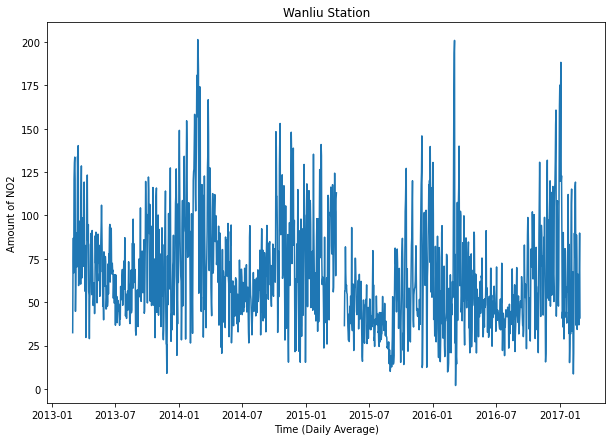

In [81]:
#lineplot for Wanliu Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_wanl_avg, x='date', y='NO2')
plt.ylabel("Amount of NO2")
plt.xlabel('Time (Daily Average)')
plt.title("Wanliu Station");

From these line plot can see that none of these are stationary. There does seem to be any trends with these 3 stations - Changping, Huairou, and Wanliu; however, there does seem to be some seasonality happening. 

## Train/Test Split

In [ ]:
#imports 
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()

Train test split, im